In [2]:
import re
from collections import Counter

import os.path
import matplotlib.pyplot as plt
import operator
import pandas as pd
import praw
import os as os
import pickle 
pd.options.display.max_columns = 999

from os import listdir
from os.path import isfile, join

import math

#Visualization imports
from bokeh.plotting import figure, show
from bokeh.core.properties import value
from bokeh.models.widgets import Panel, Tabs
from bokeh.io import show, output_notebook
output_notebook()
import numpy as np
from bokeh.models import ColumnDataSource
from bokeh.transform import dodge

#Keywords that we chose to anaylize
keys = ['past', 'present', 'future', 'swear', 'affect', 'posemo', 'negemo', 'anx', 'anger', 'sad', 'discrep']


Loading BokehJS ...

In [283]:
import seaborn as sns
sns.set()

In [154]:
import re #for regex

# PLOTS

In [3]:
# Plot the monthly sentiments of the given articles to compare different keywords in a given sentiment
color =["#e6194b","#3cb44b","#ffe119","#0082c8","#f58231","#911eb4","#46f0f0","#f032e6","#d2f53c","#fabebe","#008080","#e6beff","#aa6e28","#fffac8","#800000","#aaffc3","#808000","#ffd8b1","#000080","#808080","#FFFFFF","#000000","#1F77B4", "#B85A0D", '#878787', "#E377C2", '#66ccff', '#cc0066', '#cccc00', '#98DF8A', "#82853B","#92a8d1","#034f84","#f7cac9","#f7786b","#d5f4e6","#80ced6","#fefbd8","#618685","#ffef96","#50394c","#b2b2b2","#f4e1d2","#deeaee","#b1cbbb","#eea29a","#c94c4c","#3e4444","#82b74b","#405d27","#c1946a","#b9936c","#dac292",
"#e6e2d3","#c4b7a6","#6b5b95","#feb236","#d64161","#ff7b25","#eaece5","#b2c2bf","#c0ded9","#3b3a30","#c8c3cc","#563f46","#8ca3a3","#484f4f","#686256",
"#c1502e","#587e76","#a96e5b","#bccad6","#8d9db6","#667292","#f1e3dd","#cfe0e8","#b7d7e8","#87bdd8","#daebe8","#fbefcc","#f9ccac","#f4a688","#e0876a",
"#f9d5e5","#eeac99","#e06377","#c83349","#5b9aa0","#d6d4e0","#b8a9c9","#622569","#96ceb4","#ffeead","#ffcc5c","#ff6f69","#588c7e","#f2e394","#f2ae72","#d96459"]*5

def plot_monthly_sentiments(keywords,log=False, sentiment='num_comments'):
    df = pd.read_csv('data/sentiment_analysis_data.csv')
    df.drop(['RC_2017-01.csv', 'RC_2017-02.csv', 'RC_2017-03.csv'], axis=1, inplace=True)
    axis_type = 'linear'
    if (log):
        axis_type = 'log'
    df1 = pd.DataFrame(columns=df.columns)
    for keyword in keywords:
        df1 = pd.concat([df1, df[(df.keyword==keyword) & (df.sentiment==sentiment)]])
    df=df1.copy()
    for col in df.columns[2:]:
        df.rename(columns={col:col[0:-4]}, inplace = True)

    data = {'keywords': list(df.columns[2:])}
    for i, row in df.iterrows():
        data[row.keyword] = list(row.values[2:])
    source = ColumnDataSource(data=data)

    p = figure(x_range=list(df.columns[2:]), plot_width = 970, title= sentiment,  
               y_axis_type=axis_type)
    i=0
    for indx, row in df.iterrows():
        p.line(data['keywords'], data[row.keyword], color=color[i], legend=value(row.keyword), line_width=1.5)
        i+=1
    p.xaxis.major_label_orientation = math.pi/3
    p.grid.grid_line_alpha=1
    p.x_range.range_padding = 0.01
    p.legend.location = "top_left"
    p.legend.click_policy="hide"
    
    tab = Panel(child=p, title=sentiment)
    return tab

def plot_monthly_multiple_sentiments(keywords, log=False):
    tabs=[]
    sentiments = ['num_comments', 'num_deleted', 'num_removed', 'past', 'present', 'future', 'swear', 'affect', 'posemo', 'negemo', 'anx', 'anger', 'sad', 'discrep', 'comments_analyzed']
    for sentiment in sentiments:
        tab=plot_monthly_sentiments(keywords, log=log, sentiment=sentiment)
        tabs.append(tab)
    tabs = Tabs(tabs=tabs)
    show(tabs)


Plot the Sentiment analysis of the given articles for all the months together in a multibar visualization

In [4]:


color =["#e6194b","#3cb44b","#ffe119","#0082c8","#f58231","#911eb4","#46f0f0","#f032e6","#d2f53c","#fabebe","#008080","#e6beff","#aa6e28","#fffac8","#800000","#aaffc3","#808000","#ffd8b1","#000080","#808080","#FFFFFF","#000000","#1F77B4", "#B85A0D", '#878787', "#E377C2", '#66ccff', '#cc0066', '#cccc00', '#98DF8A', "#82853B","#92a8d1","#034f84","#f7cac9","#f7786b","#d5f4e6","#80ced6","#fefbd8","#618685","#ffef96","#50394c","#b2b2b2","#f4e1d2","#deeaee","#b1cbbb","#eea29a","#c94c4c","#3e4444","#82b74b","#405d27","#c1946a","#b9936c","#dac292",
"#e6e2d3","#c4b7a6","#6b5b95","#feb236","#d64161","#ff7b25","#eaece5","#b2c2bf","#c0ded9","#3b3a30","#c8c3cc","#563f46","#8ca3a3","#484f4f","#686256",
"#c1502e","#587e76","#a96e5b","#bccad6","#8d9db6","#667292","#f1e3dd","#cfe0e8","#b7d7e8","#87bdd8","#daebe8","#fbefcc","#f9ccac","#f4a688","#e0876a",
"#f9d5e5","#eeac99","#e06377","#c83349","#5b9aa0","#d6d4e0","#b8a9c9","#622569","#96ceb4","#ffeead","#ffcc5c","#ff6f69","#588c7e","#f2e394","#f2ae72","#d96459"]*5

def plot_multibar_sentiment(articles):
    keys = ['past', 'present', 'future', 'swear', 'affect', 'positive', 'negative', 'anxiety', 'anger', 'sadness', 'discrepancy']
    
    df = pd.read_csv('data/summarized_sentiments.csv', index_col=0)
    df.rename(index=str, columns={"posemo": "positive", "negemo": "negative", "anx":"anxiety", "sad":"sadness", "discrep": "discrepancy"}, inplace=True)
    with open('data/list_num_comments_analyzed', 'rb') as fp:
        dict_num_posts = pickle.load(fp)
    art = articles.copy()
    for article in art: 
        #We only plot the article with more than 50 comments
        if (dict_num_posts[article]<50):
            articles.remove(article)
    data = {'LIWC' : keys}
    for i, article in enumerate(articles):
        data[article] = list(df.loc[article])
    for art in articles:
        print('Number of posts '+ art +': '+ str(dict_num_posts[art]))
    source = ColumnDataSource(data=data)
    p = figure(x_range=keys, plot_height=500, plot_width = 970, title="Sentiment Analysis",
               toolbar_location=None, tools="")

    incr=0
    base = 0.8/len(articles)
    for i,art in enumerate(articles):
        p.vbar(x=dodge('LIWC', -base+incr, range=p.x_range), top=art, width=base-0.05, source=source,
           color=color[i], legend=value(art))
        incr+=base

    #p.vbar(x=dodge('Topics',  0.25, range=p.x_range), top='2017', width=0.2, source=source,
           #color="#e84d60", legend=value("2017"))

    p.x_range.range_padding = 0.1
    p.xgrid.grid_line_color = None
    p.legend.location = "top_right"
    p.legend.click_policy="hide"

    show(p)

## Main Visualization: Sentiment Analysis for different articles

Visualization of the values of the sentiment analysis of the given articles.

In [5]:
pd.read_csv('data/summarized_sentiments.csv', index_col=0).head()

,past,present,future,swear,affect,posemo,negemo,anx,anger,sad,discrep
human-computer interaction,0.104476,0.069073,0.013627,0.011799,0.068891,0.065284,0.015819,0.005227,0.013402,0.002917,0.064798
open platform,0.025649,0.137604,0.019203,0.008909,0.068433,0.051659,0.025525,0.005797,0.025469,0.006276,0.025265
open-source software,0.027010,0.087632,0.013230,0.002933,0.059512,0.048287,0.018546,0.003263,0.008498,0.003537,0.024404
temporary work,0.023310,0.081260,0.010680,0.005202,0.046297,0.030836,0.016434,0.002500,0.009245,0.002658,0.020701
digital identity,0.016820,0.099356,0.012082,0.003806,0.068799,0.055561,0.017415,0.005032,0.010696,0.003135,0.022286


In [6]:
#Select the articles and the topic (social or technological) to visualize.
articles = ['gdpr', 'fake news', 'intellectual property']
plot_multibar_sentiment(articles)

Number of posts gdpr: 35332.0
Number of posts fake news: 510531.0
Number of posts intellectual property: 21335.0


In [10]:
plot_monthly_multiple_sentiments(['twitter', 'google', 'facebook', 'amazon', 'zte', 'tencent', 'internet'])

In [183]:
comment = pd.read_csv('data/sentiment_analysis_data.csv'
                      ,index_col='keyword')
comment

,sentiment,RC_2017-01.csv,RC_2017-02.csv,RC_2017-03.csv,RC_2017-04.csv,RC_2017-05.csv,RC_2017-06.csv,RC_2017-07.csv,RC_2017-08.csv,RC_2017-09.csv,RC_2017-10.csv,RC_2017-11.csv,RC_2017-12.csv,RC_2018-01.csv,RC_2018-02.csv,RC_2018-03.csv,RC_2018-04.csv,RC_2018-05.csv,RC_2018-06.csv,RC_2018-07.csv,RC_2018-08.csv
keyword,,,,,,,,,,,,,,,,,,,,,
human-computer interaction,num_comments,2.0,2.0,0.0,5.0,0.0,6.0,0.0,4.0,5.0,1.0,0.0,40.0,7.0,5.0,9.0,12.0,3.0,15.0,1.0,0.0
open platform,num_comments,92.0,3.0,0.0,18.0,20.0,6.0,1.0,13.0,7.0,1.0,116.0,8.0,61.0,174.0,117.0,48.0,73.0,172.0,59.0,126.0
open-source software,num_comments,9.0,31.0,0.0,254.0,93.0,16.0,5.0,148.0,131.0,23.0,1.0,18.0,37.0,20.0,65.0,382.0,76.0,90.0,13.0,48.0
digital commons,num_comments,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
temporary work,num_comments,40.0,124.0,3.0,114.0,31.0,38.0,61.0,91.0,75.0,202.0,108.0,108.0,118.0,49.0,80.0,214.0,71.0,33.0,305.0,50.0
digital identity,num_comments,2.0,33.0,0.0,5.0,55.0,30.0,46.0,1.0,21.0,23.0,59.0,12.0,19.0,63.0,38.0,308.0,6.0,21.0,15.0,45.0
smart city,num_comments,33.0,59.0,0.0,73.0,33.0,129.0,97.0,40.0,102.0,150.0,4793.0,123.0,84.0,104.0,66.0,102.0,79.0,119.0,24.0,67.0
robot tax,num_comments,22.0,126.0,0.0,230.0,90.0,28.0,3.0,99.0,338.0,1018.0,0.0,64.0,14.0,7.0,12.0,11.0,1.0,0.0,2.0,0.0
blockchain,num_comments,3501.0,3867.0,84.0,3795.0,5089.0,8199.0,7698.0,11017.0,10176.0,15551.0,13150.0,23515.0,29859.0,27100.0,34645.0,37744.0,38446.0,40684.0,28432.0,29484.0


In [184]:
comment[comment.sentiment == 'comments_analyzed']

,sentiment,RC_2017-01.csv,RC_2017-02.csv,RC_2017-03.csv,RC_2017-04.csv,RC_2017-05.csv,RC_2017-06.csv,RC_2017-07.csv,RC_2017-08.csv,RC_2017-09.csv,RC_2017-10.csv,RC_2017-11.csv,RC_2017-12.csv,RC_2018-01.csv,RC_2018-02.csv,RC_2018-03.csv,RC_2018-04.csv,RC_2018-05.csv,RC_2018-06.csv,RC_2018-07.csv,RC_2018-08.csv
keyword,,,,,,,,,,,,,,,,,,,,,
human-computer interaction,comments_analyzed,1.0,1.0,0.0,5.0,0.0,6.0,0.0,4.0,4.0,1.0,0.0,40.0,7.0,5.0,9.0,11.0,2.0,11.0,1.0,0.0
open platform,comments_analyzed,89.0,3.0,0.0,15.0,20.0,6.0,1.0,13.0,6.0,1.0,111.0,6.0,52.0,155.0,102.0,41.0,62.0,145.0,47.0,113.0
open-source software,comments_analyzed,6.0,23.0,0.0,244.0,88.0,16.0,5.0,140.0,115.0,20.0,1.0,14.0,37.0,18.0,63.0,358.0,73.0,85.0,12.0,46.0
digital commons,comments_analyzed,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
temporary work,comments_analyzed,38.0,117.0,3.0,103.0,27.0,34.0,54.0,85.0,66.0,194.0,106.0,90.0,102.0,41.0,76.0,207.0,62.0,31.0,272.0,49.0
digital identity,comments_analyzed,2.0,31.0,0.0,4.0,52.0,29.0,41.0,1.0,19.0,21.0,55.0,9.0,18.0,54.0,35.0,292.0,6.0,20.0,12.0,43.0
smart city,comments_analyzed,29.0,54.0,0.0,66.0,29.0,113.0,88.0,40.0,97.0,145.0,3010.0,108.0,71.0,95.0,58.0,99.0,74.0,110.0,21.0,62.0
robot tax,comments_analyzed,18.0,116.0,0.0,216.0,85.0,27.0,3.0,94.0,329.0,863.0,0.0,57.0,10.0,7.0,10.0,11.0,1.0,0.0,2.0,0.0
blockchain,comments_analyzed,3187.0,3539.0,76.0,3498.0,4630.0,7482.0,6986.0,10072.0,8994.0,13975.0,11867.0,21262.0,26721.0,24164.0,30493.0,33828.0,34414.0,34501.0,23459.0,23798.0


In [185]:
comment.index.nunique()

300

In [186]:
comment = comment.drop(['sentiment'],axis=1)

comment.head()

,RC_2017-01.csv,RC_2017-02.csv,RC_2017-03.csv,RC_2017-04.csv,RC_2017-05.csv,RC_2017-06.csv,RC_2017-07.csv,RC_2017-08.csv,RC_2017-09.csv,RC_2017-10.csv,RC_2017-11.csv,RC_2017-12.csv,RC_2018-01.csv,RC_2018-02.csv,RC_2018-03.csv,RC_2018-04.csv,RC_2018-05.csv,RC_2018-06.csv,RC_2018-07.csv,RC_2018-08.csv
keyword,,,,,,,,,,,,,,,,,,,,
human-computer interaction,2.0,2.0,0.0,5.0,0.0,6.0,0.0,4.0,5.0,1.0,0.0,40.0,7.0,5.0,9.0,12.0,3.0,15.0,1.0,0.0
open platform,92.0,3.0,0.0,18.0,20.0,6.0,1.0,13.0,7.0,1.0,116.0,8.0,61.0,174.0,117.0,48.0,73.0,172.0,59.0,126.0
open-source software,9.0,31.0,0.0,254.0,93.0,16.0,5.0,148.0,131.0,23.0,1.0,18.0,37.0,20.0,65.0,382.0,76.0,90.0,13.0,48.0
digital commons,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
temporary work,40.0,124.0,3.0,114.0,31.0,38.0,61.0,91.0,75.0,202.0,108.0,108.0,118.0,49.0,80.0,214.0,71.0,33.0,305.0,50.0


In [187]:
comment= comment.apply(pd.to_numeric).astype(int)

In [188]:
#spikes of the keywords
comment.idxmax(axis=1)

keyword
human-computer interaction    RC_2017-12.csv
open platform                 RC_2018-02.csv
open-source software          RC_2018-04.csv
digital commons               RC_2017-01.csv
temporary work                RC_2018-07.csv
digital identity              RC_2018-04.csv
smart city                    RC_2017-11.csv
robot tax                     RC_2017-10.csv
blockchain                    RC_2018-06.csv
sustainability                RC_2017-06.csv
user interface                RC_2018-03.csv
smart grid                    RC_2018-04.csv
virtual currency              RC_2018-01.csv
semantic analysis             RC_2018-01.csv
project maven                 RC_2018-05.csv
3gpp                          RC_2017-06.csv
secure by design              RC_2018-06.csv
user privacy                  RC_2017-01.csv
empowerment                   RC_2018-06.csv
level playing field           RC_2018-04.csv
algorithmic discrimination    RC_2017-12.csv
factcheck                     RC_2018-07.csv
ob

In [189]:
comment.columns

Index(['RC_2017-01.csv', 'RC_2017-02.csv', 'RC_2017-03.csv', 'RC_2017-04.csv',
       'RC_2017-05.csv', 'RC_2017-06.csv', 'RC_2017-07.csv', 'RC_2017-08.csv',
       'RC_2017-09.csv', 'RC_2017-10.csv', 'RC_2017-11.csv', 'RC_2017-12.csv',
       'RC_2018-01.csv', 'RC_2018-02.csv', 'RC_2018-03.csv', 'RC_2018-04.csv',
       'RC_2018-05.csv', 'RC_2018-06.csv', 'RC_2018-07.csv', 'RC_2018-08.csv'],
      dtype='object')

In [190]:
comment['tot'] = comment.sum(axis=1)

In [191]:
comment.head()

,RC_2017-01.csv,RC_2017-02.csv,RC_2017-03.csv,RC_2017-04.csv,RC_2017-05.csv,RC_2017-06.csv,RC_2017-07.csv,RC_2017-08.csv,RC_2017-09.csv,RC_2017-10.csv,RC_2017-11.csv,RC_2017-12.csv,RC_2018-01.csv,RC_2018-02.csv,RC_2018-03.csv,RC_2018-04.csv,RC_2018-05.csv,RC_2018-06.csv,RC_2018-07.csv,RC_2018-08.csv,tot
keyword,,,,,,,,,,,,,,,,,,,,,
human-computer interaction,2,2,0,5,0,6,0,4,5,1,0,40,7,5,9,12,3,15,1,0,117
open platform,92,3,0,18,20,6,1,13,7,1,116,8,61,174,117,48,73,172,59,126,1115
open-source software,9,31,0,254,93,16,5,148,131,23,1,18,37,20,65,382,76,90,13,48,1460
digital commons,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
temporary work,40,124,3,114,31,38,61,91,75,202,108,108,118,49,80,214,71,33,305,50,1915


In [192]:
comment = comment.groupby(comment.index).sum()
comment.head()

,RC_2017-01.csv,RC_2017-02.csv,RC_2017-03.csv,RC_2017-04.csv,RC_2017-05.csv,RC_2017-06.csv,RC_2017-07.csv,RC_2017-08.csv,RC_2017-09.csv,RC_2017-10.csv,RC_2017-11.csv,RC_2017-12.csv,RC_2018-01.csv,RC_2018-02.csv,RC_2018-03.csv,RC_2018-04.csv,RC_2018-05.csv,RC_2018-06.csv,RC_2018-07.csv,RC_2018-08.csv,tot
keyword,,,,,,,,,,,,,,,,,,,,,
3gpp,2,0,0,0,0,36,0,0,0,24,2,0,16,0,0,0,8,0,0,8,96
5g,15980,18114,366,20568,16180,16182,16606,16010,17056,22242,20292,20400,26764,22254,19006,24540,23758,23734,21290,28296,389638
5g standard,0,0,0,2,0,0,0,8,0,0,4,0,0,0,0,2,0,98,6,0,120
ai algorithm,148,18,0,62,68,4,102,22,6,40,86,24,46,30,42,10,34,64,586,872,2264
ai assistant,244,190,4,138,98,202,34,54,40,46,80,58,18,138,20,392,388,30,174,118,2466


In [193]:
comment.sort_values(by='tot',ascending =False)

,RC_2017-01.csv,RC_2017-02.csv,RC_2017-03.csv,RC_2017-04.csv,RC_2017-05.csv,RC_2017-06.csv,RC_2017-07.csv,RC_2017-08.csv,RC_2017-09.csv,RC_2017-10.csv,RC_2017-11.csv,RC_2017-12.csv,RC_2018-01.csv,RC_2018-02.csv,RC_2018-03.csv,RC_2018-04.csv,RC_2018-05.csv,RC_2018-06.csv,RC_2018-07.csv,RC_2018-08.csv,tot
keyword,,,,,,,,,,,,,,,,,,,,,
iot,643002,748310,4808,336786,312086,302536,332496,454930,655096,753490,517552,754980,867496,808110,405064,388856,364272,360842,424884,527530,9963126
twitter,480344,397788,5744,294990,349250,372532,379944,382312,394144,407502,414910,356532,410784,363124,399600,417646,476228,399322,501748,528130,7732574
google,286046,263380,6918,324112,301452,275118,260170,564790,324366,443884,319426,330862,368128,284168,351922,328422,351474,265978,328128,463320,6442064
facebook,355046,215108,3680,278684,275936,229360,225728,247496,323896,279600,264686,258280,300826,348354,629578,459424,346788,255286,372350,315056,5985162
internet,216068,232952,8604,208794,252042,301176,281420,227374,297432,223520,412964,404752,253066,242296,277918,252758,315956,307176,330278,344860,5391406
bitcoin,121734,101268,2130,92788,171550,144796,161754,310002,272840,315024,601386,884720,485436,344594,260822,229488,236124,173292,171608,171414,5252770
amazon,194552,185438,5408,171918,144910,205090,271392,217448,255884,388828,265808,240990,269694,228674,239496,318188,259404,215876,303598,217494,4600090
net neutrality,26872,30620,944,53640,132338,26958,214518,39532,15852,44152,688648,590854,123968,46666,23660,21476,124796,74868,26268,34866,2341496
social media,92600,59438,732,54790,68292,79248,77678,78586,82446,81908,117466,83016,101526,98060,109290,90648,121288,109480,111832,123976,1742300


In [194]:
comment = comment[comment['tot'] > 0]
#droping the columns that have total =0

In [178]:
#comment.to_excel("C:\\Users\\user\\Documents\\DT\\comment.xlsx")

In [197]:
#comment.reset_index()
#comment.index.[].apply
#drop tot
comment = comment.drop(['tot'], axis = 1)

In [198]:
temp={'youtube kids':'youtube kid'
                      ,'w3c':'world wide web consortium'
                      ,'virtual private network':'vpn'
                      ,'v2v':'vehicle-to-vehicle'
                      ,'virtual collaboration':'virtual community'
                      ,'conspiracy theory':'conspiracy theories'
                      ,'cryptocurrencies':'cryptocurrency'
                      ,'decentralisation':'decentralization'
                      ,'hci':'human-computer interaction'
                      ,'netneutrality':'net neutrality'
                      ,'open access':'open source'
                      ,'open data':'open source'
                      ,'open spectrum':'open source'
                      ,'open standard':'open source'
                     }

comment = comment.rename(index=temp)


In [199]:
comment = comment.groupby(comment.index).sum()
comment

,RC_2017-01.csv,RC_2017-02.csv,RC_2017-03.csv,RC_2017-04.csv,RC_2017-05.csv,RC_2017-06.csv,RC_2017-07.csv,RC_2017-08.csv,RC_2017-09.csv,RC_2017-10.csv,RC_2017-11.csv,RC_2017-12.csv,RC_2018-01.csv,RC_2018-02.csv,RC_2018-03.csv,RC_2018-04.csv,RC_2018-05.csv,RC_2018-06.csv,RC_2018-07.csv,RC_2018-08.csv
keyword,,,,,,,,,,,,,,,,,,,,
3gpp,2,0,0,0,0,36,0,0,0,24,2,0,16,0,0,0,8,0,0,8
5g,15980,18114,366,20568,16180,16182,16606,16010,17056,22242,20292,20400,26764,22254,19006,24540,23758,23734,21290,28296
5g standard,0,0,0,2,0,0,0,8,0,0,4,0,0,0,0,2,0,98,6,0
ai algorithm,148,18,0,62,68,4,102,22,6,40,86,24,46,30,42,10,34,64,586,872
ai assistant,244,190,4,138,98,202,34,54,40,46,80,58,18,138,20,392,388,30,174,118
ai chip,0,0,0,0,228,38,244,10,512,134,70,512,48,46,4,164,10,58,32,908
ai startup,106,124,2,12,66,62,42,90,86,30,76,32,58,44,374,202,78,44,102,92
ai system,224,1242,4,204,40,78,224,480,320,130,124,500,184,178,212,132,146,3104,166,76
algorithmic bias,0,0,0,0,0,0,0,0,0,0,0,20,0,0,6,0,0,2,0,2


In [207]:
columns = comment.columns.tolist()[:]
columns

['RC_2017-01.csv',
 'RC_2017-02.csv',
 'RC_2017-03.csv',
 'RC_2017-04.csv',
 'RC_2017-05.csv',
 'RC_2017-06.csv',
 'RC_2017-07.csv',
 'RC_2017-08.csv',
 'RC_2017-09.csv',
 'RC_2017-10.csv',
 'RC_2017-11.csv',
 'RC_2017-12.csv',
 'RC_2018-01.csv',
 'RC_2018-02.csv',
 'RC_2018-03.csv',
 'RC_2018-04.csv',
 'RC_2018-05.csv',
 'RC_2018-06.csv',
 'RC_2018-07.csv',
 'RC_2018-08.csv']

In [208]:
new = [re.split(r'_', i)[1][:7] for i in columns]
new

['2017-01',
 '2017-02',
 '2017-03',
 '2017-04',
 '2017-05',
 '2017-06',
 '2017-07',
 '2017-08',
 '2017-09',
 '2017-10',
 '2017-11',
 '2017-12',
 '2018-01',
 '2018-02',
 '2018-03',
 '2018-04',
 '2018-05',
 '2018-06',
 '2018-07',
 '2018-08']

In [270]:
pd.to_datetime(new, format='%Y-%m')
comment.columns = new
comment.head()

,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08
keyword,,,,,,,,,,,,,,,,,,,,
3gpp,2,0,0,0,0,36,0,0,0,24,2,0,16,0,0,0,8,0,0,8
5g,15980,18114,366,20568,16180,16182,16606,16010,17056,22242,20292,20400,26764,22254,19006,24540,23758,23734,21290,28296
5g standard,0,0,0,2,0,0,0,8,0,0,4,0,0,0,0,2,0,98,6,0
ai algorithm,148,18,0,62,68,4,102,22,6,40,86,24,46,30,42,10,34,64,586,872
ai assistant,244,190,4,138,98,202,34,54,40,46,80,58,18,138,20,392,388,30,174,118


In [272]:
comment_transpose = comment.T
comment_transpose.head()

keyword,3gpp,5g,5g standard,ai algorithm,ai assistant,ai chip,ai startup,ai system,algorithmic bias,algorithmic discrimination,algorithms,altright,amazon,apple inc,artificial general intelligence,artificial intelligence,artificial neural network,augmented reality,automated reasoning,autonomous car,autonomous vehicle,autonomous weapon,backward compatibility,bci,big data,bitcoin,black box,blockchain,blockchain platform,brain-computer interface,cambridge analytica,censorship,chinese tech,circular economy,cloud computing,cloud native,coinhiv,competition law,computer vision,conspiracy theories,context awareness,copyright,credential stuffing,cryptocurrency,cryptography,cyber sovereignty,cyberattack,cybercrime,cybersecurity,dark web,data aggregation,data analysis,data broker,data center,data literacy,data localization,data mining,data ownership,data retention,data scandal,data sovereignty,data visualization,decentralization,deep learning,deep neural,deep web,deepfake,deletefacebook,digital citizen,digital currency,digital divide,digital economy,digital health,digital identity,digital labor,digital learning,digital signature,digital single market,digital surveillance,digital transformation,digital twin,disruptive innovation,distance education,distributed computing,distributed ledger,e-administration,e-commerce,e-democracy,e-procurement,echo chamber,economic inequality,edge computing,educational technology,ehealth,election meddling,electronic voting,empowerment,encryption,ethereum,evolutionary computing,exascal,eye tracking,facebook,factcheck,fake account,fake news,filter bubble,financial technology,fog computing,freedom of speech,future proof,gdpr,general data protection regulation,global basic income,global education,global positioning system,globalization,google,gps,green computing,green economy,gsm,hate speech,huggiebot,human-computer interaction,hyperconnectivity,hyperledger,identity management,image recognition,immersive technology,information ethics,information explosion,information privacy,information society,infowar,innovation hub,intellectual property,internet,internet access,internet freedom,internet governance,internet safety,interoperability,iot,killer robot,knowledge commons,kosinski,level playing field,linux,live streaming,living lab,machine learning,machine translation,metoo,microtargeting,misinformation,monero,monopoly,multicloud,multidisciplinary approach,nanotechnology,nbn,ncsc,net neutrality,network security,network transparency,notpetya,object recognition,open innovation,open platform,open security,open source,open-source governance,open-source hardware,open-source model,open-source software,openai,p2p,participatory democracy,peer-to-peer,person robot,personal cloud,personal data,personalized marketing,personally identifiable information,political polarization,post-truth,price discrimination,privacy,privacy by design,project maven,project zero,quantum computing,quantum network,quantum supremacy,quantum technology,qubit,real-time collaboration,recommender system,regulatory technology,reinforcement learning,reputation system,resilience,right to be forgotten,right to internet access,robot consciousness,robot ethics,robot tax,robotics,russian interference,russian troll,scalability,secure by design,secure communication,semantic analysis,semantic web,sharing economy,smart city,smart contract,smart grid,smart objects,smartphone,social inequality,social innovation,social media,social networking service,social objects,soft robotics,speech recognition,speech translation,stellar,surveillance,sustainability,swarm intelligence,tamper resistance,targeted advertising,temporary work,tencent,twitter,ubiquitous computing,usability,user experience,user interface,user-centered design,vehicle-to-vehicle,virtual community,virtual currency,virtual reality,virtualization,vpn,wealth concentration,web accessibility,world wide web consortium,youtube kid,zte
2017-01,2,15980,0,148,244,0,106,224,0,0,2916,14478,194552,430,108,9388,78,926,0,7254,

In [277]:
social_issues = comment_transpose[['metoo','deletefacebook','cambridge analytica'
                 ,'empowerment'
                        ,'freedom of speech'
                        ,'hate speech'
                        ,'political polarization'
                        ,'price discrimination'
                        ,'censorship'
                        ,'data scandal'
                        ,'election meddling'
                        ,'right to be forgotten'
                        ,'right to internet access'
                        ,'russian interference'  
                       ]]
social_issues.head()

keyword,metoo,deletefacebook,cambridge analytica,empowerment,freedom of speech,hate speech,political polarization,price discrimination,censorship,data scandal,election meddling,right to be forgotten,right to internet access,russian interference
2017-01,64,0,82,2084,3672,5118,46,6,22632,0,588,2,0,1976
2017-02,4,0,194,994,5954,12288,326,24,21674,0,140,6,0,148
2017-03,0,0,4,2,136,86,2,2,354,0,0,0,0,0
2017-04,12,18,158,1350,4856,7314,678,46,24206,0,1564,0,0,1322
2017-05,8,2,252,2180,7388,7440,208,22,24912,0,1070,20,0,8056


<h1><center>Checking Trends for Social Issues</center></h1>


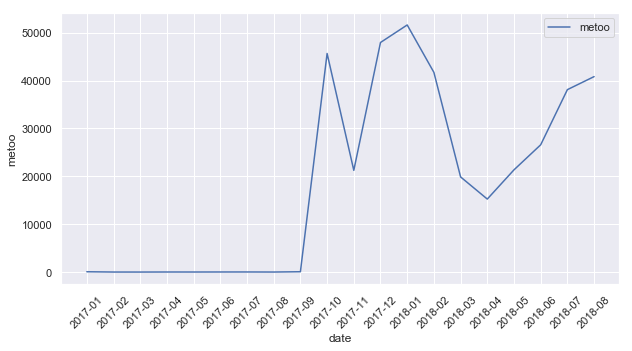

In [286]:
#metoo
f, ax = plt.subplots(1, 1, figsize=(10,5))
ax.set(xlabel='date', ylabel='comment count')
sns.lineplot(ax = ax, x = social_issues.index, y = 'metoo', data = social_issues)
ax.legend(labels=["metoo"])
plt.xticks(rotation=45);

The #metoo was started in mid Oct 2017, thus we can see the spike for the month of Oct'17. As with most viral news, it slowed down,
again peaked in Dec'17 as Time's magazine decided to chose their Person's of the Year as people who had spoken out. The trend again
going up towards the later part of 2018, is due to its spreading in Asian countries like India.

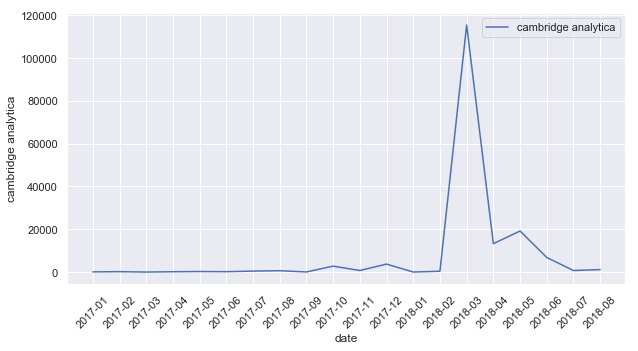

In [288]:
#cambridge analytica
f, ax = plt.subplots(1, 1, figsize=(10,5))
ax.set(xlabel='date', ylabel='comment count')
sns.lineplot(ax = ax, x = social_issues.index, y = 'cambridge analytica', data = social_issues)
ax.legend(labels=["cambridge analytica"])
plt.xticks(rotation=45);

The Cambridge Analytica whistleblower - Christopher Wylie tweet

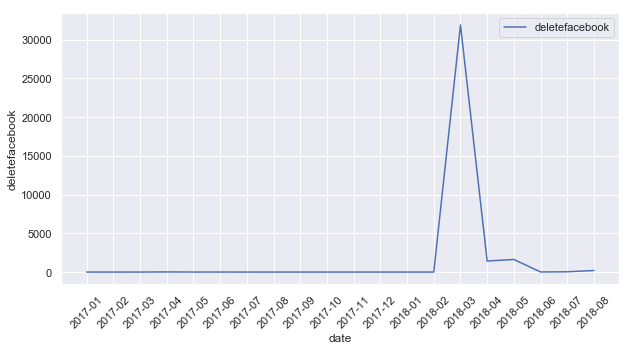

In [287]:
#deletefacebook
f, ax = plt.subplots(1, 1, figsize=(10,5))
ax.set(xlabel='date', ylabel='comment count')
sns.lineplot(ax = ax, x = social_issues.index, y = 'deletefacebook', data = social_issues)
ax.legend(labels=["deletefacebook"])
plt.xticks(rotation=45);

The backlash against Facebook in the aftermath of the Cambridge Analytica scandal has prompted a movement to delete facebook in different countries.

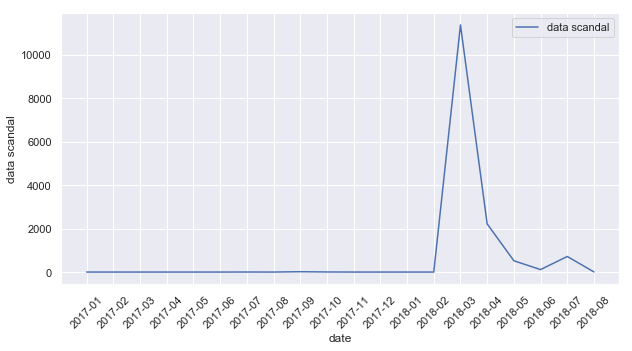

In [295]:
#data scandal
f, ax = plt.subplots(1, 1, figsize=(10,5))
ax.set(xlabel='date', ylabel='comment count')
sns.lineplot(ax = ax, x = social_issues.index, y = 'data scandal', data = social_issues)
ax.legend(labels=['data scandal'])
plt.xticks(rotation=45);

The data scandal peaked at the time of Cambridge Analytica scandal, so inference is this refers to Facebook scandal

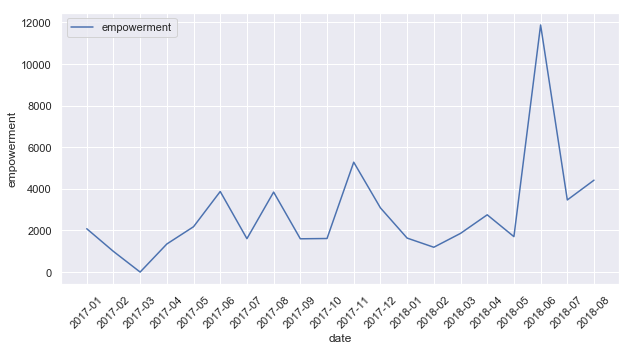

In [289]:
#empowerment
f, ax = plt.subplots(1, 1, figsize=(10,5))
ax.set(xlabel='date', ylabel='comment count')
sns.lineplot(ax = ax, x = social_issues.index, y = 'empowerment', data = social_issues)
ax.legend(labels=["empowerment"])
plt.xticks(rotation=45);

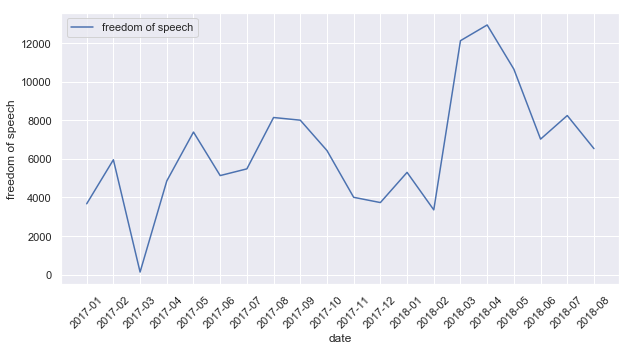

In [290]:
#freedom of speech
f, ax = plt.subplots(1, 1, figsize=(10,5))
ax.set(xlabel='date', ylabel='comment count')
sns.lineplot(ax = ax, x = social_issues.index, y = 'freedom of speech', data = social_issues)
ax.legend(labels=['freedom of speech'])
plt.xticks(rotation=45);

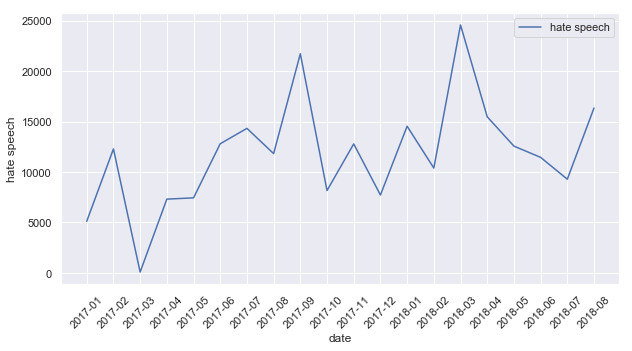

In [291]:
#hate speech
f, ax = plt.subplots(1, 1, figsize=(10,5))
ax.set(xlabel='date', ylabel='comment count')
sns.lineplot(ax = ax, x = social_issues.index, y = 'hate speech', data = social_issues)
ax.legend(labels=['hate speech'])
plt.xticks(rotation=45);

We can clearly see to spikes during Sep 17 and Mar 18. Probably Mar'18 is due to the Cambridge Analytica scandal. And Sep'17 maybe due to Catalonian Independence movement in Spain.

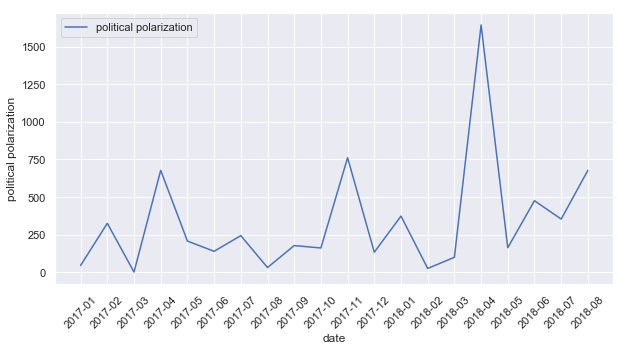

In [292]:
#political polarization
f, ax = plt.subplots(1, 1, figsize=(10,5))
ax.set(xlabel='date', ylabel='comment count')
sns.lineplot(ax = ax, x = social_issues.index, y = 'political polarization', data = social_issues)
ax.legend(labels=['political polarization'])
plt.xticks(rotation=45);

Again, this may refer to the Cambridge Analytica whistleblower that 2016 US presidential election, 2016 Brexit vote, 2018 Mexican general election were affected as politcians paid CA to use information from the Facebook data breach. 

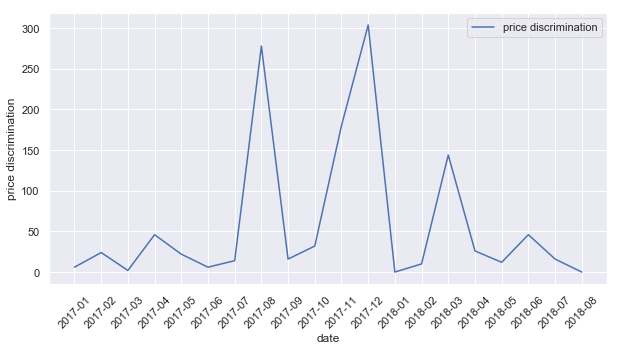

In [293]:
#price discrimination
f, ax = plt.subplots(1, 1, figsize=(10,5))
ax.set(xlabel='date', ylabel='comment count')
sns.lineplot(ax = ax, x = social_issues.index, y = 'price discrimination', data = social_issues)
ax.legend(labels=['price discrimination'])
plt.xticks(rotation=45);

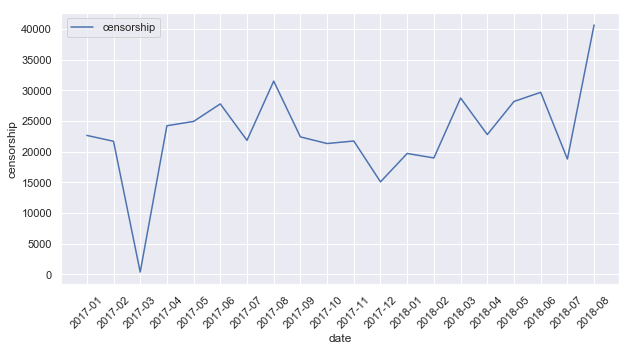

In [294]:
#censorship
f, ax = plt.subplots(1, 1, figsize=(10,5))
ax.set(xlabel='date', ylabel='comment count')
sns.lineplot(ax = ax, x = social_issues.index, y = 'censorship', data = social_issues)
ax.legend(labels=['censorship'])
plt.xticks(rotation=45);

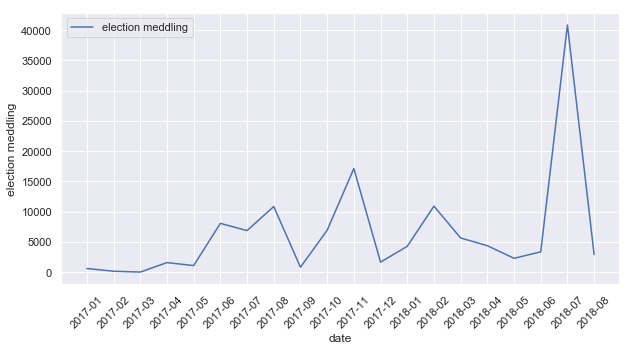

In [296]:
#election meddling
f, ax = plt.subplots(1, 1, figsize=(10,5))
ax.set(xlabel='date', ylabel='comment count')
sns.lineplot(ax = ax, x = social_issues.index, y = 'election meddling', data = social_issues)
ax.legend(labels=['election meddling'])
plt.xticks(rotation=45);

Outcry in the US that Russia tried to influence the 2016 elections

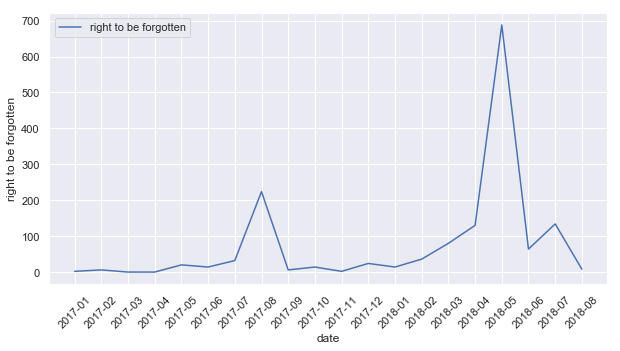

In [297]:
#right to be forgotten
f, ax = plt.subplots(1, 1, figsize=(10,5))
ax.set(xlabel='date', ylabel='comment count')
sns.lineplot(ax = ax, x = social_issues.index, y = 'right to be forgotten', data = social_issues)
ax.legend(labels=['right to be forgotten'])
plt.xticks(rotation=45);

GDPR came

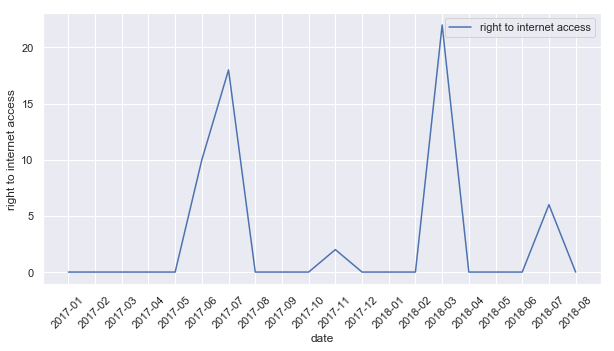

In [298]:
#right to internet access
f, ax = plt.subplots(1, 1, figsize=(10,5))
ax.set(xlabel='date', ylabel='comment count')
sns.lineplot(ax = ax, x = social_issues.index, y = 'right to internet access', data = social_issues)
ax.legend(labels=['right to internet access'])
plt.xticks(rotation=45);

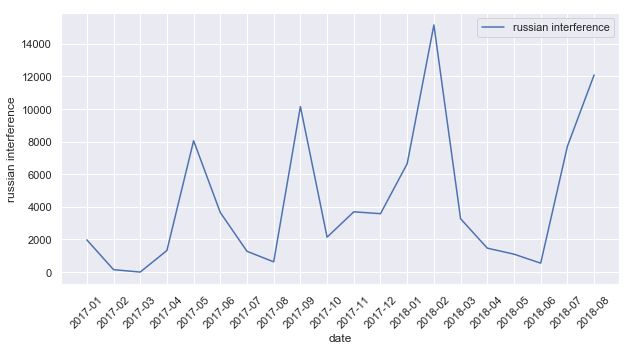

In [299]:
#russian interference
f, ax = plt.subplots(1, 1, figsize=(10,5))
ax.set(xlabel='date', ylabel='comment count')
sns.lineplot(ax = ax, x = social_issues.index, y = 'russian interference', data = social_issues)
ax.legend(labels=['russian interference'])
plt.xticks(rotation=45);

The peak of Feb'18 happened during the time when a former Russian spy and his daughter were poisoned which UK said were approved by Russia.

<p style="text-align: center;">Finding Correlation</p>

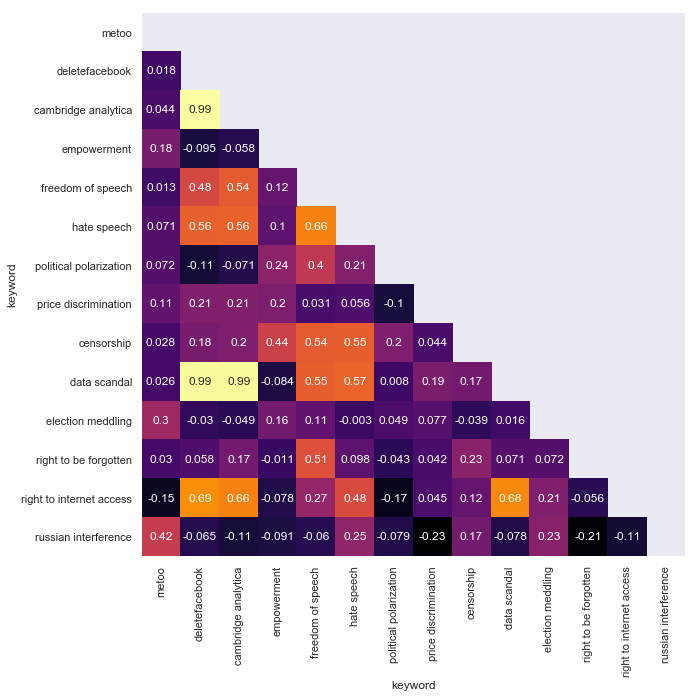

In [306]:
corr_social = social_issues.corr()
mask = np.zeros_like(corr_social)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(20,10))
with sns.axes_style("white"):
    sns.heatmap(corr_social, mask=mask, square=True, annot=True, cmap="inferno", cbar=False)

<p style="text-align: center;">**Some Observations:**</p>
1. Data Scandal,delete facebook and cambridge analytica has **0.99** correaltion between them
2. Censorship has a correlation of **0.54** and **0.55** with freedom of speech and hate speech
3. Freedom of speech and hate speech have a correlation of **0.66**
4. Data Scandal has a correlation of **0.68** with right to internet access
5. Right to be forgotten has a **0.51** correlation with freedom of speech
6. Empowerment has a correlation of **0.44** with censorship 
7. Political polarization has a  **0.4** correlation with freedom of speech

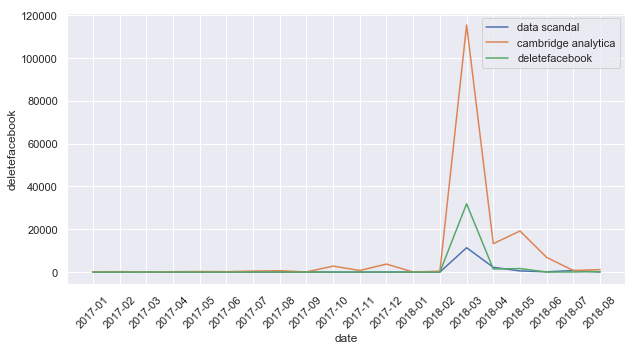

In [309]:
f, ax = plt.subplots(1, 1, figsize=(10,5))
ax.set(xlabel='date', ylabel='comment count')

sns.lineplot(ax = ax, x = social_issues.index, y = 'data scandal', data = social_issues)
sns.lineplot(ax = ax, x = social_issues.index, y = 'cambridge analytica', data = social_issues)
sns.lineplot(ax = ax, x = social_issues.index, y = 'deletefacebook', data = social_issues)
ax.legend(labels=["data scandal","cambridge analytica", "deletefacebook"])
plt.xticks(rotation=45);

0.99 correlation

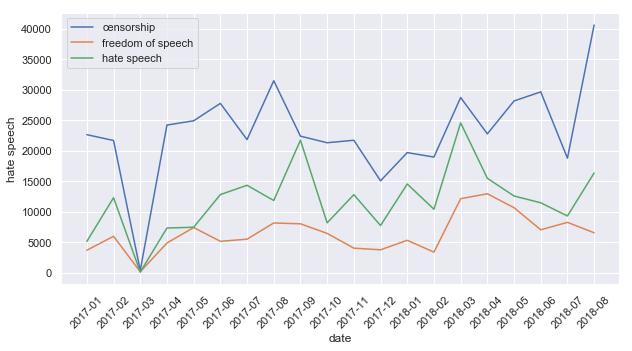

In [310]:
f, ax = plt.subplots(1, 1, figsize=(10,5))
ax.set(xlabel='date', ylabel='comment count')

sns.lineplot(ax = ax, x = social_issues.index, y = 'censorship', data = social_issues)
sns.lineplot(ax = ax, x = social_issues.index, y = 'freedom of speech', data = social_issues)
sns.lineplot(ax = ax, x = social_issues.index, y = 'hate speech', data = social_issues)
ax.legend(labels=["censorship","freedom of speech", "hate speech"])
plt.xticks(rotation=45);

When censorship spikes',there is more hate speech. There's a slight increase in freedom of speech as well.

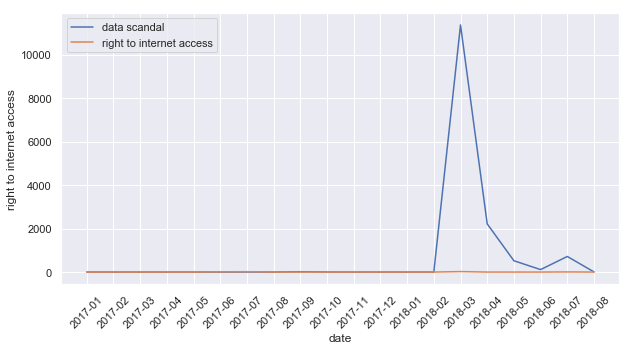

In [311]:
f, ax = plt.subplots(1, 1, figsize=(10,5))
ax.set(xlabel='date', ylabel='comment count')

sns.lineplot(ax = ax, x = social_issues.index, y = 'data scandal', data = social_issues)
sns.lineplot(ax = ax, x = social_issues.index, y = 'right to internet access', data = social_issues)

ax.legend(labels=["data scandal","right to internet access"])
plt.xticks(rotation=45);

Despite a correlation of 0.68, the plot shows that there is actually no correlation, as it cannot pick the spike

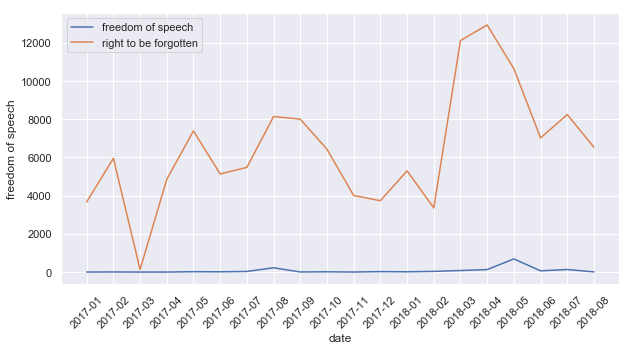

In [314]:
f, ax = plt.subplots(1, 1, figsize=(10,5))
ax.set(xlabel='date', ylabel='comment count')

sns.lineplot(ax = ax, x = social_issues.index, y = 'right to be forgotten', data = social_issues)
sns.lineplot(ax = ax, x = social_issues.index, y = 'freedom of speech', data = social_issues)

ax.legend(labels=["freedom of speech","right to be forgotten"])
plt.xticks(rotation=45);

We can see during regulation of GDPR (May 18) freedom of speech had a spike whereas right to be forgotten had a pre-GDPR spike for 2 months, probably beacause of the hype

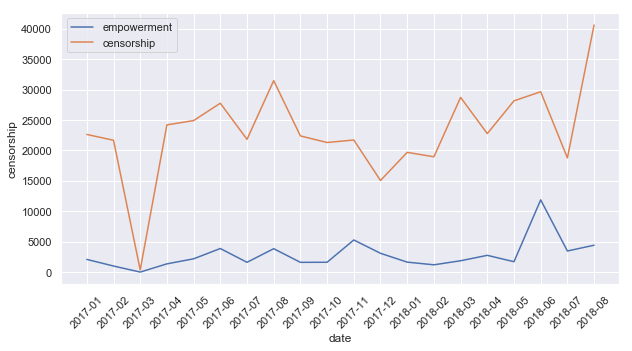

In [316]:
f, ax = plt.subplots(1, 1, figsize=(10,5))
ax.set(xlabel='date', ylabel='comment count')

sns.lineplot(ax = ax, x = social_issues.index, y = 'empowerment', data = social_issues)
sns.lineplot(ax = ax, x = social_issues.index, y = 'censorship', data = social_issues)

ax.legend(labels=["empowerment","censorship"])
plt.xticks(rotation=45);

We can see whenever there is a spike in censorship, there is a spike in empowerment, thus maybe people protest against it

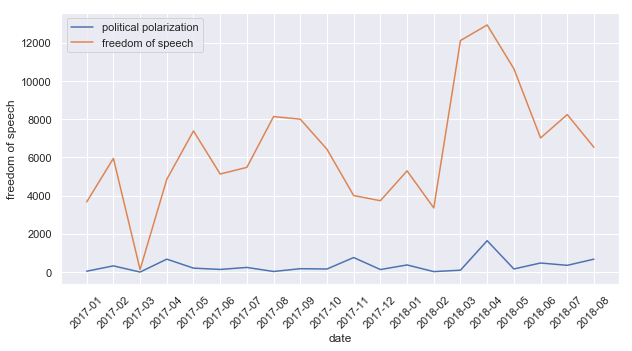

In [317]:
f, ax = plt.subplots(1, 1, figsize=(10,5))
ax.set(xlabel='date', ylabel='comment count')

sns.lineplot(ax = ax, x = social_issues.index, y = 'political polarization', data = social_issues)
sns.lineplot(ax = ax, x = social_issues.index, y = 'freedom of speech', data = social_issues)

ax.legend(labels=["political polarization","freedom of speech"])
plt.xticks(rotation=45);

Although, all spikes donot have a likewise, but we can see for the highest spike in political polarization, freedom of speech is directly related.

In [318]:
crypto = comment_transpose[['blockchain'
         ,'decentralization'
         ,'ethereum'
         ,'bitcoin'
         ,'coinhiv'
         ,'cryptocurrency'
         ,'blockchain platform'
         ,'distributed ledger','monero','virtual currency'
         ]]

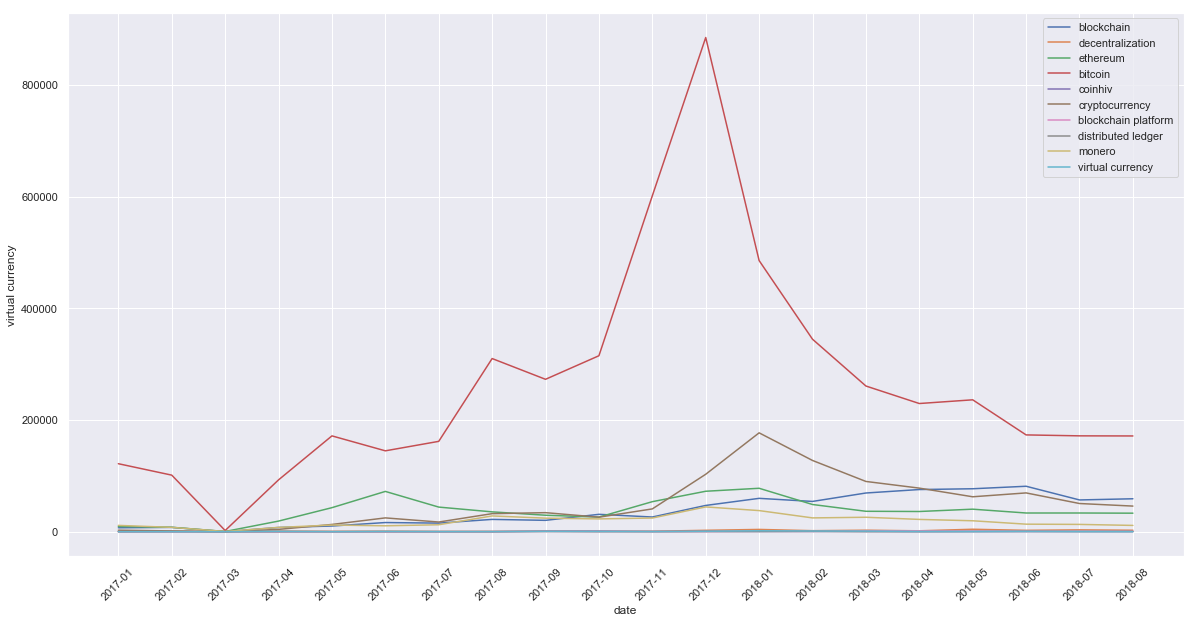

In [320]:
f, ax = plt.subplots(1, 1, figsize=(20,10))
ax.set(xlabel='date', ylabel='comment count')

sns.lineplot(ax = ax, x = crypto.index, y = 'blockchain', data = crypto)
sns.lineplot(ax = ax, x = crypto.index, y = 'decentralization', data = crypto)
sns.lineplot(ax = ax, x = crypto.index, y = 'ethereum', data = crypto)
sns.lineplot(ax = ax, x = crypto.index, y = 'bitcoin', data = crypto)
sns.lineplot(ax = ax, x = crypto.index, y = 'coinhiv', data = crypto)
sns.lineplot(ax = ax, x = crypto.index, y = 'cryptocurrency', data = crypto)
sns.lineplot(ax = ax, x = crypto.index, y = 'blockchain platform', data = crypto)
sns.lineplot(ax = ax, x = crypto.index, y = 'distributed ledger', data = crypto)
sns.lineplot(ax = ax, x = crypto.index, y = 'monero', data = crypto)
sns.lineplot(ax = ax, x = crypto.index, y = 'virtual currency', data = crypto)

ax.legend(labels=['blockchain','decentralization','ethereum','bitcoin','coinhiv','cryptocurrency'
                  ,'blockchain platform','distributed ledger','monero','virtual currency'])
plt.xticks(rotation=45);

<p style="text-align: center;">Finding Correlation</p>

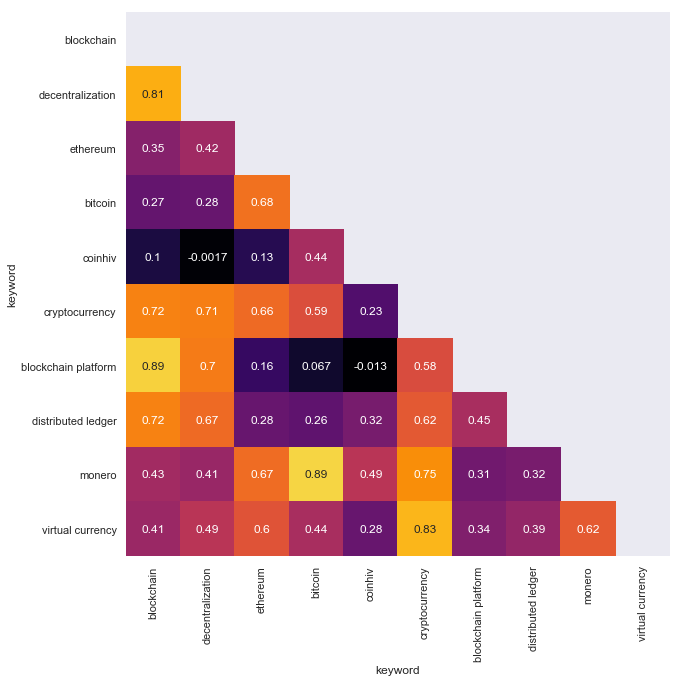

In [321]:
corr_crypto = crypto.corr()
mask = np.zeros_like(corr_crypto)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(20,10))
with sns.axes_style("white"):
    sns.heatmap(corr_crypto, mask=mask, square=True, annot=True, cmap="inferno", cbar=False)

In [416]:
#NYSE google trends data
nyse = pd.read_csv("C:\\Users\\user\\Documents\\DT\\multiTimeline.csv"
                   )
nyse = nyse.reset_index()
nyse.columns = ['Week','new york stock exchange: (United States)']
nyse = nyse.iloc[1:] #first row was week and new york stock exchange , so not considering it
nyse['Week'] = pd.to_datetime(nyse['Week'])
nyse['new york stock exchange: (United States)'] = nyse['new york stock exchange: (United States)'].astype(int)
nyse = nyse[(nyse.Week >= '2017') & (nyse.Week < '2019')] #keeping only data from 2017 and 2018
nyse['month_yr'] = nyse.Week.dt.to_period('M')
nyse = nyse.drop(['Week'],axis=1)
nyse.set_index(["month_yr"], inplace = True, append = True, drop = True) 
#nyse = nyse.idxmax(axis=0) #doing a groupby of 'month_yr' and adding values in nyse:US
nyse.head()

,,new york stock exchange: (United States)
,month_yr,
149,2017-01,10
150,2017-01,9
151,2017-01,7
152,2017-01,9
153,2017-01,7


In [428]:
Per_month_tot = nyse.groupby(['month_yr'])['new york stock exchange: (United States)'].sum()
nyse = pd.DataFrame(data=Per_month_tot)
nyse = nyse.reset_index()
nyse.head()

,month_yr,new york stock exchange: (United States)
0,2017-01,42
1,2017-02,36
2,2017-03,31
3,2017-04,40
4,2017-05,25


[Text(0,0.5,'comment count'), Text(0.5,0,'date')]

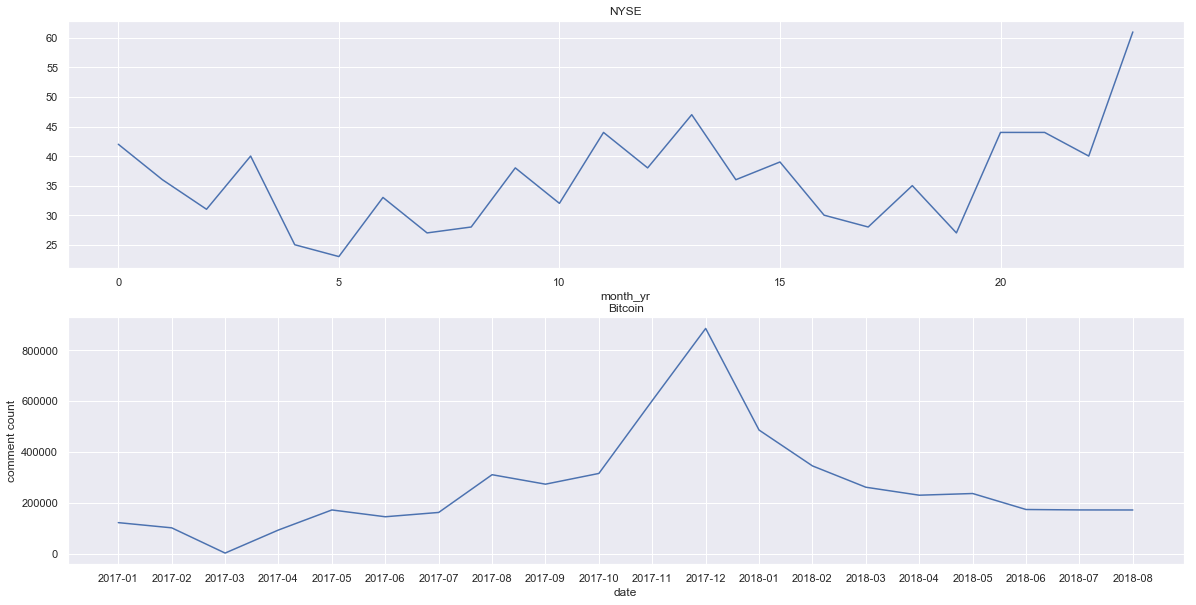

In [450]:
f, ax = plt.subplots(2, 1, figsize=(20,10))
ax[0].plot(nyse['new york stock exchange: (United States)'])
ax[1].plot(crypto['bitcoin']);
ax[0].set_title("NYSE")
ax[1].set_title("Bitcoin")
ax[0].set(xlabel='month_yr')
ax[1].set(xlabel='date', ylabel='comment count')

We can see that there is not a significant correlation between NYSE trend and bitcoin comments(Bitcoin rate nearly doubled around Nov 17 and reached its peak value soon after)